In [1]:
%matplotlib inline

# Vanilla Autoencoder

<img src="https://miro.medium.com/max/3148/1*44eDEuZBEsmG_TCAKRI3Kw@2x.png">

In class I will cover the math that powers autoencoders

In this Jupyter workbook page I am focusing on code to help you better understand them

Go grab you some MNIST data

http://yann.lecun.com/exdb/mnist/

Or you can grab it in a different format that is a little more Python friendly

https://www.python-course.eu/neural_network_mnist.php

First, lets load in that data

In [2]:
import torch
from torch.autograd import Variable
from torch.autograd import Function
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch.optim as optim
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

###########################################
###########################################
# load us some MNIST data
###########################################
###########################################

image_size = 28 # width and length
no_of_different_labels = 10 #  i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size
print("Image has this many pixels: " + str(image_pixels))
data_path = "Data/"
train_data = np.loadtxt(data_path + "mnist_train.csv", delimiter=",")
print("(Number of data points, dim)")
print(train_data.shape)

Image has this many pixels: 784
(Number of data points, dim)
(60000, 785)


Draw one of those characters

Digit is 7.0


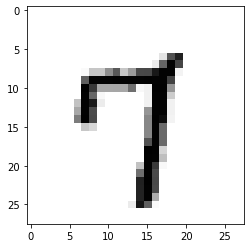

In [3]:
Index = 750
DigitLabel = train_data[Index,0] # grab that label
print("Digit is " + str(DigitLabel))
Digit = train_data[Index,1::].reshape((28,28)) # knock off that label
plt.imshow(Digit, cmap="Greys")
plt.show()

Make a small set of data to work with below

Also, lets reduce the size of our digit imagery

(200, 784)
200
(784,)


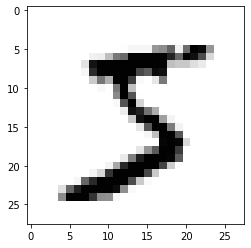

(196,)


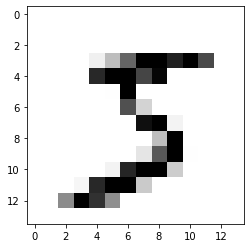

In [4]:
data = train_data[0:200,1::] # pull out first 200 images
N = data.shape[0] # how many are there? (just checking!)
print( data.shape )
print( N )

# draw it
Index = 0
print( data[Index,:].shape )
D = data[Index,:].reshape((28,28))
plt.imshow(D, cmap="Greys")
plt.show()
# make it 1/2 size in width and 1/2 in height (so 1/4th of total size)
D = D[0::2,0::2]
print( D.reshape((14*14)).shape )
plt.imshow(D, cmap="Greys")
plt.show()

Lets get that autoencoder running

In [5]:
###########################################
###########################################
# declare a simple autoencoder
###########################################
###########################################

class AutoEncoder(nn.Module):
    
    def __init__(self, D_in, H, D_out):
        super(AutoEncoder, self).__init__()        
        self.encoder = nn.Sequential(
            nn.Linear(D_in, H), # out image mapped to H neurons (our 'code')
            nn.ReLU(),
#           nn.Sigmoid(),   # you guys can use whatever nonlinearity you want         
        )
        self.decoder = nn.Sequential(
            nn.Linear(H, D_out), # blow that code back out to our full image size
            nn.ReLU(),
#           nn.Sigmoid(),            
        )
        
    def forward(self, x):
        c = self.encoder(x) 
        d = self.decoder(c)
        return d, c

Now, train away!

In [6]:
###########################################
###########################################
# create an instance 
###########################################
###########################################

D_in, H, D_out = 14*14, 15, 14*14    
net = AutoEncoder(D_in, H, D_out).cpu()

###########################################
###########################################
# optimization
###########################################
###########################################

criterion = nn.MSELoss(reduction='mean')

#optimizer = optim.SGD(net.parameters(), lr=1e-2)
#optimizer = optim.SGD(net.parameters(), lr=1e-3, momentum=0.9)
#optimizer = optim.Adam(net.parameters(), lr=1e-4, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=True)
optimizer = optim.Adam(net.parameters(),weight_decay=1e-5)

###########################################
###########################################
# Optimize folks!
###########################################
###########################################

# lets do stochastic gradient descent (will maybe drop in some mini batch for you soon)
NoEpochs = 250
Err = np.zeros((NoEpochs))
for epoch in tqdm(range(NoEpochs),'Epochs'):
    for i in range(N):
        D = data[i,:].reshape((28,28))
        D = D[0::2,0::2].reshape((14*14))
        X = torch.Tensor(D)
        optimizer.zero_grad()
        output, code = net(X)
        loss = criterion(output, X)
        loss.backward()
        optimizer.step()
        Err[epoch] = Err[epoch] + loss 

Epochs: 100%|████████████████████████████████████████████████████████████████████████| 250/250 [00:22<00:00, 11.26it/s]


Plot error

In [ ]:
plt.plot(Err)
plt.show()

Show the result

In [ ]:
# do for one digit

Index = 0
Digit = data[Index,:].reshape((28,28))
Digit = Digit[0::2,0::2]
plt.imshow(Digit, cmap="Greys")
plt.show()

# push that through our net
X = torch.Tensor(Digit.reshape((14*14)))
output, code = net(X)
        
NetOutput = ((output.data).cpu().numpy()).reshape((14,14))
plt.imshow(NetOutput, cmap="Greys")
plt.show()

code = (code.data).cpu().numpy()
plt.stem(code, use_line_collection=True)
plt.show()

# do for another

Index = 10
Digit = data[Index,:].reshape((28,28))
Digit = Digit[0::2,0::2]
plt.imshow(Digit, cmap="Greys")
plt.show()

# push that through our net
X = torch.Tensor(Digit.reshape((14*14)))
output, code = net(X)
        
NetOutput = ((output.data).cpu().numpy()).reshape((14,14))
plt.imshow(NetOutput, cmap="Greys")
plt.show()

code = (code.data).cpu().numpy()
plt.stem(code, use_line_collection=True)
plt.show()

# Q&A

**Simple**

  * Change the number of layers in the encoder and decoder
  * Do you need to have the same number of layers in the encoder and decoder?
  * How small can you make the Encoder-Decoder and get something *pleasing* ;-)

**Hard**

  * Can you regularize the above AE?... (yes, do it!)